In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

Duplicate key in file PosixPath('/mnt/home/shibogp/conda_environment/vmoat2_2025cp/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 266 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')


In [ ]:
import os
from glob import glob




In [ ]:
root_path = '/mnt/data/old_home/strength/vmoat'
ans = pd.read_csv(root_path + 'xxxxxxx.csv')

# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')
# ans = pd.read_csv('')


ans

In [ ]:

pd_list = os.listdir(root_path + '/userstudy_wsbnew/answers_under5s/')
focused_list_1 = glob(root_path + '/userstudy_wsbnew/answers_under5s/focused_*')
focused_list_0 = [root_path + '/path1',
                root_path + 'paath2',
               root_path + 'path3',
               root_path + 'path4',
               root_path + 'path5',
                root_path + 'path6'
               ]
focused_list = focused_list_0 + focused_list_1
ans = pd.DataFrame()
for i in focused_list:
    temp_pd = pd.read_csv(i + '/test_result.csv')
    ans = pd.concat([ans, temp_pd], ignore_index=True)

In [ ]:
ans

# 在这里做出的一点改变  仅增加了这一个单元格，其他的不变, 直接加载csv数据集，不需要一轮一轮的跑

In [ ]:

# ans.to_csv('/home/vmoat/userstudy_wsbnew/user_study_pywebio-master/answers_under5s_all.csv')


ans = pd.read_csv(root_path + '/userstudy_wsbnew/user_study_pywebio-master/answers_under5s_all_new_audibility2.csv').drop(['Unnamed: 0.2', 'Unnamed: 0.1'], axis=1)
ans = ans.sort_values(by='audibility2')

ans['ori_path'] = ans['ori_path'].str.replace('/home/vmoat', root_path, regex=False)
ans['adv_path'] = ans['adv_path'].str.replace('/home/vmoat', root_path, regex=False)



# 
ans_df_adv = ans[(ans['audibility2']!=0)]







In [ ]:
min(ans['audibility2']), max(ans['audibility2'])

In [ ]:
len(focused_list)

In [ ]:
# 关于正确率
#   option =0 表示 第一个是干净的   =1表示第二个是干净的 
# select_result 问卷的每道题目有 2 段音频,用户需要对 2 段音频进  行判断,选择“第一条音频有噪声”或者“第二条音频有噪声”或者“两条音频一  样”的结果1,0,2
# 答案选择正确的干净样本 和 选择正确的对抗样本
right_ans_clean = ans[(ans['audibility2']==0) & (ans['select_result']==2)]
right_ans_adv = ans[(ans['audibility2']!=0) & (ans['option']==ans['select_result'])]

# 答案选择错误的干净样本 和 选择错误的对抗样本
fault_ans_clean = ans[(ans['audibility2']==0) & (ans['select_result']!=2)]
fault_ans_adv = ans[(ans['audibility2']!=0) & (ans['option']!=ans['select_result'])]


# cnt_list = [0,0,0] #clean option=0 option=1
# for row in range(0, len(this_data)):
#     if this_data.iloc[row, this_data.columns.get_loc('audibility2')]==0:
#         cnt_list[0] = cnt_list[0] + 1
#     else:
#         if this_data.iloc[row, this_data.columns.get_loc('option')]==0:
#             cnt_list[1] = cnt_list[1] + 1
#         else:
#             cnt_list[2] = cnt_list[2] + 1
    
len(right_ans_clean)

In [ ]:
len(right_ans_adv)

In [ ]:
len(fault_ans_clean)

In [ ]:
len(fault_ans_adv)

In [ ]:
ans_df_adv

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# 看一下所有的数据，简单的看一下数据的分布
# plt.scatter(right_ans_clean['audibility2'],right_ans_clean['select_result'], color = 'b', alpha = 0.2)
plt.scatter(right_ans_adv['audibility2'],right_ans_adv['select_result'], color = 'b', alpha = 0.2)   # 选择正确的对抗样本
# plt.scatter(fault_ans_clean['audibility2'],fault_ans_clean['select_result'], color = 'r', alpha = 0.2)
plt.scatter(fault_ans_adv['audibility2'],fault_ans_adv['select_result'], color = 'r', alpha = 0.2)   # 选择错误的对抗样本
plt.xscale('log')
plt.title('answers of adv audio')
plt.xlabel('audibility2')
plt.ylabel('select_result')
# 1 是指第一条有噪声
# 0 是指第二条有噪声
# 2 是指两条音频一样的   




In [ ]:
plt.scatter(fault_ans_clean['audibility2'],fault_ans_clean['select_result'], color = 'r', alpha = 0.2)
plt.scatter(right_ans_clean['audibility2'],right_ans_clean['select_result'], color = 'b', alpha = 0.2)
plt.title('answers of clean audio')

In [ ]:
fault_ans_adv.iloc[5,2]

In [ ]:
import IPython
IPython.display.Audio(fault_ans_adv.iloc[5,2])

In [ ]:
IPython.display.Audio(fault_ans_adv.iloc[5,3])

In [ ]:
# 1,0中的红色不考虑，只考虑区间选2的百分比    柱状图的下标： 不同level  统计所有人

# 每个人的正确率，统计正确率比较高的百分比                              统计大部分人

# 准确率 百分多少的人可以有多少的准确率以上  直方图
# 关于召回率的直方图                         直方图

In [ ]:
# adv 
def intervals_df_num(pd_data):
    intervals = [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
    print(type(right_ans_adv['audibility2'][0]))
    bar_list = [] # 记录10个区间的回答正确的数量
    for i in range(len(intervals)-1):
        bar_list.append(pd_data[(pd_data['audibility2']>=intervals[i]) & (pd_data['audibility2']<intervals[i+1])])
    bar_num = []
    for i in range(0,len(bar_list)):
        bar_num.append(len(bar_list[i]))
    return bar_num

In [ ]:
fault_ans_adv_2 = ans[(ans['audibility2']!=0) & (ans['select_result']==2)]
fault_ans_adv_2

In [ ]:
high_quality_df_adv

In [ ]:
# high_quality_df_adv  是已经排好顺序的df
# 按照high_quality_list中的个数来判断，每103*3个就为一个区间，一共十个区间，判断满足的个数
# 因为原本的区间的设计就是十个区间，一个区间里面三个问题，所以就是103*3个问题
def intervals_df_num_fault_adv(high_quality_df_adv, person_num):   #pd_data是已经按照audibility排好顺序了
#     intervals = [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
    print(type(right_ans_adv['audibility2'][0]))
    bar_list = [] # 记录10个区间的回答正确的数量
    temp_cnt = 0
    for i in range(len(high_quality_df_adv)):
        if i % (person_num*3) == 0:
            bar_list.append(temp_cnt)
            temp_cnt = 0
        if high_quality_df_adv.iloc[i,6] ==2:
            temp_cnt = temp_cnt+1

    bar_list.append(temp_cnt)
    return bar_list

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
fig = plt.figure( dpi=500)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# data = intervals_df_num(fault_ans_adv_2)
# 3是因为每个范围音频的数量是3个
person_num = len(focused_list)
data = intervals_df_num_fault_adv(ans_df_adv, person_num)[1:]
# data = intervals_df_num_2(high_quality_df_adv, 103)[1:]

data

data = [i / (person_num * 3) for i in data]
# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']


# color_list = [
#     (255, 190, 11),
#     (251, 86, 7),
#     (255, 0, 110),
#     (131, 56, 236),
#     (58, 134, 255),
#     (232,135,115),
#     (246,192,184)
# ]
color_list = [
 (156, 66, 101), 
 (187, 44, 67), 
 (229, 40, 93), 
 (189, 76, 41), 
 (188, 45, 112), 
 (235, 77, 81), 
 (191, 87, 95), 
 (235, 56, 136),
 (198, 69, 129), 
 (181, 66, 40), 

]

color_list = [(249, 162, 137), (243, 138, 153), (235, 113, 143), (238, 143, 152), (221, 127, 147), (232, 136, 171), (221, 170, 199), (246, 203, 211), (254, 228, 240), (249, 237, 244)]
# 249,162,137
# 243,138,153
# 235,113,143
# 238,143,152
# 221,127,147
# 232,136,171
# 221,170,199
# 246,203,211
# 254,228,240
# 249,237,244

# 218,127,140
# 159,87,161
# 167,106,173
# 246,152,29
# 217,49,56
# 193,216,50
# 78,177,174
# 158,154,60
# 16,91,122
# 39,138,135
# 167,106,173
color_list = [(218, 127, 140), (159, 87, 161), (246, 152, 29), (217, 49, 56), (193, 216, 50), (78, 177, 174), (158, 154, 60), (16, 91, 122), (39, 138, 135),(147,174,149),(105,114,86)]

color_list = [(a/255, b/255, c/255) for a, b, c in color_list]


# 绘制直方图
plt.bar(labels, data, color=color_list, hatch='', edgecolor='black')
for i, v in enumerate(data):
    plt.text(labels[i], v + 0.01, str(round(v, 2)), ha='center', va='bottom')
# 添加标题和标签
plt.title('fault_ans_adv_2')
plt.xlabel('Audibility Interval', fontsize=10)
plt.ylabel('Values')
# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)

plt.ylim([0, 0.8])
# plt.xticks(rotation='vertical')
plt.tight_layout()
# 显示图形
plt.show()



In [ ]:
data

In [ ]:
# 可以单独运行用于画图
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("All Users", "Hq Users")
penguin_means = {
    'Interval_1': (0.63, 0.61),
    'Interval_2': (0.59, 0.55),
    'Interval_3': (0.39, 0.29),
    'Interval_4': (0.35, 0.26),
    'Interval_5': (0.28, 0.19),
    'Interval_6': (0.20, 0.09),
    'Interval_7': (0.17, 0.06),
    'Interval_8': (0.12, 0.05),
    'Interval_9': (0.11, 0.01),
    'Interval_10': (0.07, 0.01),

}

x = np.array([0,12])  # the label locations
width = 1
# the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 5), dpi=500)
# cnt = 0 
# color_list = [
#  (156, 66, 101), 
#  (187, 44, 67), 
#  (229, 40, 93), 
#  (189, 76, 41), 
#  (188, 45, 112), 
#  (235, 77, 81), 
#  (191, 87, 95), 
#  (235, 56, 136),
#  (198, 69, 129), 
#  (181, 66, 40), 
# ]
color_list = [(218, 127, 140), (159, 87, 161), (246, 152, 29), (217, 49, 56), (193, 216, 50), (78, 177, 174), (158, 154, 60), (16, 91, 122), (39, 138, 135),(147,174,149),(105,114,86)]
# color_list = [(249, 162, 137), (243, 138, 153), (235, 113, 143), (238, 143, 152), (221, 127, 147), (232, 136, 171), (221, 170, 199), (246, 203, 211), (254, 228, 240), (249, 237, 244)]

color_list = [(a/255, b/255, c/255) for a, b, c in color_list]
start=0xFB5607# From
stop=0xFFBE0B# To
num=10# Divided into 100 steps

color_list=["#{:02x}{:02x}{:02x}".format(x,y,z) for x,y,z in zip(\
np.round(np.linspace(start>>16,stop>>16,num)).astype(int),\
np.round(np.linspace((start>>8)&0xFF,(stop>>8)&0xFF,num)).astype(int),\
np.round(np.linspace(start&0xFF,stop&0xFF,num)).astype(int))]


bar_gap = 0.08  # 两个柱子之间的间距
for attribute, measurement in penguin_means.items():
    print(measurement)
    offset = (width+bar_gap) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, 
                   color = color_list[multiplier], 
                   edgecolor='black', 
#                    facecolor='white',
                   linewidth=0.8,
#                    hatch='/',
#                    alpha=0.5
                  )
    ax.bar_label(rects, padding=3)
    multiplier += 1


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_xlabel('Audibility Interval', fontsize=10)
# plt.ylabel('Values')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + 4*width, species)
ax.legend(bbox_to_anchor=(0.5, 1.15),loc='upper center', ncol=5)
ax.set_ylim(0, 0.8)
# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)

plt.show()

In [ ]:
ans_df_adv
plt.plot(range(0,len(ans_df_adv)), ans_df_adv['audibility2'])
plt.plot(interval_value)

In [ ]:
# 找到区间
interval_value = [ans_df_adv.iloc[0, 4]]
for idx,v in enumerate(range(len(ans_df_adv))):
    if ((idx+1)%(103*3))==0:
        print(ans_df_adv.iloc[idx, 4])
        interval_value.append(ans_df_adv.iloc[idx, 4])
print(interval_value)
# [(0, 0.0070224519767749),
#  (308, 0.1206297245107788),
#  (617, 0.1818201957500882),
#  (926, 0.2358020773311985),
#  (1235, 0.6440155636700106),
#  (1544, 1.014814756006546),
#  (1853, 1.6347219435080975),
#  (2162, 4.0378633264861366),
#  (2471, 7.434931271932772),
#  (2780, 14.66520613537534),
#  (3089, 406.1637113148117)]
plt.plot(range(0,309),
         ans_df_adv.iloc[2780:3089, 4])

In [ ]:
def is_decreasing(lst):
    return all(lst[i] > lst[i+1] for i in range(len(lst)-1))

In [ ]:
import numpy as np
# [(0, 0.0070224519767749),
#  (308, 0.1206297245107788),
#  (617, 0.1818201957500882),
#  (926, 0.2358020773311985),
#  (1235, 0.6440155636700106),
#  (1544, 1.014814756006546),
#  (1853, 1.6347219435080975),
#  (2162, 4.0378633264861366),
#  (2471, 7.434931271932772),
#  (2780, 14.66520613537534),
#  (3089, 406.1637113148117)]
# 定义范围
start_value = 0.1
end_value = 25

# 计算对数划分的边界
log_boundaries = np.logspace(np.log10(start_value), np.log10(end_value), num=11)

# 打印划分的边界
print(log_boundaries)


In [ ]:
from tqdm import tqdm

# for iii in tqdm(np.arange(10, 160, 0.05)):
start_value = 0.08
end_value = 15

# 计算对数划分的边界
# log_boundaries = np.logspace(np.log10(start_value), np.log10(end_value), num=11)
dbrange = range(-20,16,3)
log_boundaries = [(10**(db/10),10**((db+5)/10)) for db in dbrange]


# 自己划分常规数字的区间，从而得到各个区间的题目的个数，以及回答正确和错误对应的题目的个数
# interval_list = [0.0070224519767749, 0.1206297245107788, 0.1818201957500882, 0.2358020773311985, 0.6440155636700106, 
#                  1.014814756006546, 1.6347219435080975, 4.0378633264861366, 7.434931271932772, 14.66520613537534, 100000]
# interval_list = [0.07, 0.14, 0.21, 0.24, 0.64, 1.15, 1.5, 
#                  4, 7.5, 15, 400]
interval_list = log_boundaries
# 首先计算这个总的题目中，各个区间有分别有几个数字
# all_user_interval_list = [0]*10
all_user_interval_list = [0]*(len(interval_list))

for i in range(len(ans_df_adv)):
    audi_number = ans_df_adv.iloc[i, 4]
    for j in range(len(interval_list)):
#         if interval_list[j] < audi_number <= interval_list[j+1]:
        if interval_list[j][0] < audi_number <= interval_list[j][1]:

#             print(i,':',interval_list[j], audi_number, interval_list[j+1])
            all_user_interval_list[j] = all_user_interval_list[j] + 1

# fault_ans_adv_interval_list = [0]*10
fault_ans_adv_interval_list = [0]*(len(interval_list))

for i in range(len(fault_ans_adv_2)):
    audi_number = fault_ans_adv_2.iloc[i, 4]
    for j in range(len(interval_list)):
#         if interval_list[j] < audi_number <= interval_list[j+1]:
        if interval_list[j][0] < audi_number <= interval_list[j][1]:

            fault_ans_adv_interval_list[j] = fault_ans_adv_interval_list[j] + 1


result = [a / b for a, b in zip(fault_ans_adv_interval_list, all_user_interval_list)]

#     for idx, i in enumerate(result):
#         print(idx+1, ':', i)
# if is_decreasing(result):
#     print(iii)
#     break

# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
labels = [str(i) for i in range(1,len(interval_list)+1)]

plt.bar(labels, result)



In [ ]:
all_user_interval_list

In [ ]:
fault_ans_adv_interval_list

In [ ]:
# 可以单独运行用于画图
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
fig = plt.figure(figsize=(6, 4), dpi=500)
# fig = plt.figure(dpi=500)

# plt.figure(figsize=(6, 4))

plt.rcParams['font.sans-serif'][0] = 'Lucida Grande'
species = ("All Users")
# penguin_means = {
#     'Interval_1': 0.63,
#     'Interval_2': 0.59,
#     'Interval_3': 0.39, 
#     'Interval_4': 0.35, 
#     'Interval_5': 0.28, 
#     'Interval_6': 0.20, 
#     'Interval_7': 0.17, 
#     'Interval_8': 0.12, 
#     'Interval_9': 0.11, 
#     'Interval_10': 0.07,

# }

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# data = intervals_df_num(fault_ans_adv_2)
# 3是因为每个范围音频的数量是3个
# person_num = len(focused_list)
# data = intervals_df_num_fault_adv(ans_df_adv, person_num)[1:]
# # data = intervals_df_num_2(high_quality_df_adv, 103)[1:]

# data
# # 下面的     person_num *3 表示的是在这个区间总的题目的个数 
# data = [i / (person_num * 3) for i in data]
data = result
data = data+[0] # 没有这个的话，xtrick最右边没有刻度
# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
# interval_list = [0.07, 0.14, 0.21, 0.24, 0.64, 1.15, 1.6, 
#                  4, 7.5, 15, 400]
# labels = ["{:.2f}".format(i) for i in interval_list]
labels = ["{:d}".format(i) for i in dbrange]+['16']  # dbrange=range(-20,16,3)的右侧区间

# labels = ['0.007',
#           '0.121',
#           '0.182',
#           '0.236',
#           '0.632',
#           '1.015',
#           '1.635',
#           '3.873',
#           '6.980',
#           '14.665',
#           '112.704']

start = 0xFFBE0B   #0xF6C0B7# From
stop = 0xFF006E   #3A86FF  #4F9EAF# To
num = len(data)# Divided into 100 steps   颜色的个数

color_list=["#{:02x}{:02x}{:02x}".format(x,y,z) for x,y,z in zip(\
np.round(np.linspace(start>>16,stop>>16,num)).astype(int),\
np.round(np.linspace((start>>8)&0xFF,(stop>>8)&0xFF,num)).astype(int),\
np.round(np.linspace(start&0xFF,stop&0xFF,num)).astype(int))]


# 绘制直方图
plt.bar(x=labels,
        height=data, 
        color=color_list, 
        hatch='', 
        edgecolor='black',
        linewidth=0.6,
        width=1,#0.88,
        alpha=0.95,
        align='edge'
       )

for i, v in enumerate(data):
    T=plt.text(x=i+0.5,
             y=v+0.01, 
             s="{:.2f}".format(v), 
             ha='center',
             va='bottom',
            )
    if i==len(data)-2:
        break

# 添加标题和标签
# plt.title('fault_ans_adv_2')
plt.xlabel('噪声可听性（$10\log\mathcal{A}(\delta, x)$，dB）',size=10,family='SimHei')

# plt.ylabel('Values')
plt.ylabel('比例', fontsize=10,family='SimHei')

# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)
plt.xlim([-0.5,12.5])
plt.ylim([0, 1])
plt.xticks(x=0,
           y=0,
           rotation=0,
           ha='center',
           fontsize=10
          
          )

plt.tight_layout()
# 显示图形
# 用来获得xlabel的坐标
# xaxis = plt.gca().get_xaxis()
# x_ticks = xaxis.get_majorticklocs()

# fig.savefig('/home/vmoat/shibo/bachelor_thesis/All_figure/fault_ans_adv_2.svg', format='svg', bbox_inches = 'tight')

plt.show()


In [ ]:
x_ticks

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import numpy as np

# # 设置随机种子以保证结果可重复
# np.random.seed(42)
# # 生成正态分布的数据
# mean = 0.5
# std_dev = 0.01
# size = 1000

# data = np.random.normal(mean, std_dev, size)

# data = [0.1] + list(range(1,50)) + list(range(101,160))
# # 生成一些随机数据作为示例
# data = ans_df_adv.iloc[:, 4]
# # data = range(0,1000)
# # 绘制直方图
# plt.hist(data, 
#          bins=100, 
#          color='blue', 
#          edgecolor='black',
#          density=True,
# #          alpha=0.7,
# #          log=True,
#          histtype='bar',
# #          rwidth=0.1
#         )

# # 添加标签和标题
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Histogram Example')
# # plt.xticks()

# # plt.xscale('log')
# plt.tight_layout()

# plt.show()


In [ ]:

# for iii in tqdm(np.arange(10, 160, 0.05)):
start_value = 0.08
end_value = 15

# 计算对数划分的边界
# log_boundaries = np.logspace(np.log10(start_value), np.log10(end_value), num=11)

dbrange = range(-20,16,3)
log_boundaries = [(10**(db/10),10**((db+5)/10)) for db in dbrange]

# 自己划分常规数字的区间，从而得到各个区间的题目的个数，以及回答正确和错误对应的题目的个数
# interval_list = [0.0070224519767749, 0.1206297245107788, 0.1818201957500882, 0.2358020773311985, 0.6440155636700106, 
#                  1.014814756006546, 1.6347219435080975, 4.0378633264861366, 7.434931271932772, 14.66520613537534, 100000]
# interval_list = [0.07, 0.14, 0.21, 0.24, 0.64, 1.15, 1.5, 
#                  4, 7.5, 15, 400]
interval_list = log_boundaries
# 首先计算这个总的题目中，各个区间有分别有几个数字
# all_user_interval_list = [0]*10
all_user_interval_list = [0]*(len(interval_list))

for i in range(len(ans_df_adv)):
    audi_number = ans_df_adv.iloc[i, 4]
    for j in range(len(interval_list)):
#         if interval_list[j] < audi_number <= interval_list[j+1]:
        if interval_list[j][0] < audi_number <= interval_list[j][1]:

#             print(i,':',interval_list[j], audi_number, interval_list[j+1])
            all_user_interval_list[j] = all_user_interval_list[j] + 1

# right_ans_adv_interval_list = [0]*10
right_ans_adv_interval_list = [0]*(len(interval_list))

for i in range(len(right_ans_adv)):
    audi_number = right_ans_adv.iloc[i, 4]
    for j in range(len(interval_list)):
#         if interval_list[j] < audi_number <= interval_list[j+1]:
        if interval_list[j][0] < audi_number <= interval_list[j][1]:

            right_ans_adv_interval_list[j] = right_ans_adv_interval_list[j] + 1


right_adv_result = [a / b for a, b in zip(right_ans_adv_interval_list, all_user_interval_list)]

#     for idx, i in enumerate(result):
#         print(idx+1, ':', i)
# if is_decreasing(result):
#     print(iii)
#     break

# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
labels = [str(i) for i in range(1,len(interval_list)+1)]

plt.bar(labels, right_adv_result)


In [ ]:
# 可以单独运行用于画图
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure( dpi=500)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
species = ("All Users")
# penguin_means = {
#     'Interval_1': 0.63,
#     'Interval_2': 0.59,
#     'Interval_3': 0.39, 

#     'Interval_4': 0.35, 
#     'Interval_5': 0.28, 
#     'Interval_6': 0.20, 
#     'Interval_7': 0.17, 
#     'Interval_8': 0.12, 
#     'Interval_9': 0.11, 
#     'Interval_10': 0.07,

# }

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# data = intervals_df_num(fault_ans_adv_2)

# ori# 3是因为每个范围音频的数量是3个
# person_num = len(high_quality_list)
# hq_data = intervals_df_num_fault_adv(high_quality_df_adv, person_num)[1:]
# # data = intervals_df_num_2(high_quality_df_adv, 103)[1:]
# # data
# # data = [i/(len(high_quality_list)*3) for i in data]
# hq_data = [i / (person_num * 3) for i in hq_data]


data = right_adv_result + [0]

# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
# data = data+[0]
# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
# interval_list = [0.07, 0.14, 0.21, 0.24, 0.64, 1.15, 1.6, 
#                  4, 7.5, 15, 400]
# labels = ["{:.2f}".format(i) for i in interval_list]
labels = ["{:d}".format(i) for i in dbrange]+['16']

# labels = ['0.007-0.115',
#           '0.115-0.182',
#           '0.182-0.236',
#           '0.236-0.611',
#           '0.611-1.015',
#           '1.015-1.635',
#           '1.635-3.827',
#           '3.827-6.980',
#           '6.980-14.665',
#           '14.665-112.704']

start=0xFF006E    #0xF6C0B7# From
stop=0xFFBE0B   #3A86FF  #4F9EAF# To
num = len(data)# Divided into 100 steps   颜色的个数

color_list=["#{:02x}{:02x}{:02x}".format(x,y,z) for x,y,z in zip(\
np.round(np.linspace(start>>16,stop>>16,num)).astype(int),\
np.round(np.linspace((start>>8)&0xFF,(stop>>8)&0xFF,num)).astype(int),\
np.round(np.linspace(start&0xFF,stop&0xFF,num)).astype(int))]


# 绘制直方图
plt.bar(x=labels,
        height=data, 
        color=color_list, 
        hatch='', 
        edgecolor='black',
        linewidth=0.6,
        width=1,#0.88,
        alpha=0.95,
        align='edge'
       )
for i, v in enumerate(data):
    T=plt.text(x=i+0.5,
             y=v+0.01, 
             s="{:.2f}".format(v), 
             ha='center',
             va='bottom',
            )
    if i==len(data)-2:
        break

# 添加标题和标签
# plt.title('fault_ans_adv_2')
plt.xlabel('Audibility Interval', fontsize=10)
plt.ylabel('Values')
# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)
plt.xlim([-0.5,12.5])
plt.ylim([0, 1])
plt.xticks(x=0,
           y=0,
           rotation=0,
           ha='center',
           fontsize=10
          
          )

# 添加标题和标签
# plt.title('right_ans_adv')
# plt.xlabel('Audibility Interval', fontsize=10)
plt.xlabel('噪声可听性（$10\log\mathcal{A}(\delta, x)$，dB）',size=13,family='SimHei')
plt.ylabel('比例',size=13,family='SimHei')

# plt.ylabel('Values')
# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)
# plt.ylim([0, 0.8])
# plt.xticks(rotation=30, ha='right',fontsize=10)
plt.tight_layout()
# fig.savefig('/home/vmoat/shibo/bachelor_thesis/All_figure/right_ans_adv.svg', format='svg', bbox_inches = 'tight')

# 显示图形
plt.show()


In [ ]:
sum(data)

In [ ]:
# 按照high_quality_list中的个数来判断，每103*3个就为一个区间，一共十个区间，判断满足的个数
def intervals_df_num_right_adv(high_quality_df_adv, person_num):   #pd_data是已经按照audibility排好顺序了
#     intervals = [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
    print(type(right_ans_adv['audibility2'][0]))
    bar_list = [] # 记录10个区间的回答正确的数量
    temp_cnt = 0
    for i in range(len(high_quality_df_adv)):
        if i % (person_num*3) ==0:
            bar_list.append(temp_cnt)
            temp_cnt = 0
        if high_quality_df_adv.iloc[i,6] == high_quality_df_adv.iloc[i,5]:
            temp_cnt = temp_cnt+1

    bar_list.append(temp_cnt)
    return bar_list

In [ ]:
len(focused_list)

In [ ]:
import matplotlib.pyplot as plt
# data = intervals_df_num_right_adv(high_quality_df_adv, len(high_quality_list))[1:]
person_num = len(focused_list)
data = intervals_df_num_right_adv(ans_df_adv, person_num)[1:]
data = [i / (person_num * 3) for i in data]
# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']

# 绘制直方图
plt.bar(labels, data, color='orange') #, edgecolor='black')

# 添加标题和标签
plt.title('right_ans_adv')
plt.xlabel('Labels')
# plt.xscale('log')
plt.ylabel('Values')
# plt.ylim([0, 350])
# plt.xticks(rotation='vertical')

# 显示图形
plt.show()

In [ ]:
# 关于正确率的问题
import os
from glob import glob

pd_list = os.listdir('/home/vmoat/userstudy_wsbnew/answers_under5s/')
focused_list_1 = glob('/home/vmoat/userstudy_wsbnew/answers_under5s/focused_*')
focused_list_0 = ['/home/vmoat/userstudy_wsbnew/answers_under5s/孟令铄_男_23_中国大陆_2023-07-25(14:58:09)79786',
                '/home/vmoat/userstudy_wsbnew/answers_under5s/苗钱浩_男_22_中国大陆_2023-07-26(11:07:10)81786',
               '/home/vmoat/userstudy_wsbnew/answers_under5s/欧润民_男_25_中国大陆_2023-07-26(12:51:42)37460',
               '/home/vmoat/userstudy_wsbnew/answers_under5s/周勃阳_男_24_中国大陆_2023-07-26(12:46:44)65848',
               '/home/vmoat/userstudy_wsbnew/answers_under5s/王士博_男_22_中国大陆_2023-07-26(16:20:49)08039',
                '/home/vmoat/userstudy_wsbnew/answers_under5s/邓江毅_男_26_中国大陆_2023-07-21(20:43:22)12258'
               ]

focused_list = focused_list_0 + focused_list_1
acc_rate_list = []
acc_rate_adv_list = []
acc_rate_clean_list = []
for i in focused_list:
    temp_pd = pd.read_csv(i + '/test_result.csv')  # 每一个pd都是45条数据
    # 答案选择正确的干净样本 和 选择正确的对抗样本
    temp_right_ans_clean = temp_pd[(temp_pd['audibility2']==0) & (temp_pd['select_result']==2)]
    temp_right_ans_adv = temp_pd[(temp_pd['audibility2']!=0) & (temp_pd['option']==temp_pd['select_result'])]
    temp_right_pd = pd.concat([temp_right_ans_clean, temp_right_ans_adv], ignore_index=True)
    temp_acc_right_adv = len(temp_right_ans_adv)/len(temp_right_pd)
    tmep_acc_right_clean = len(temp_right_ans_clean)/len(temp_right_pd)
    temp_acc_rate = len(temp_right_pd)/len(temp_pd)
    acc_rate_list.append(temp_acc_rate)
    acc_rate_adv_list.append(temp_acc_right_adv)
    acc_rate_clean_list.append(tmep_acc_right_clean)
    
        
acc_rate_list

In [ ]:
# focused中的准确率分布
plt.plot(acc_rate_list)

# 高质量（准确率）选取



In [ ]:
high_quality_line = 0.7
low_quality_line = 0.4

high_quality_list = [(index, value) for index, value in enumerate(acc_rate_list) if value>high_quality_line]# < high_quality_line and value >low_quality_line]
high_quality_df = pd.DataFrame()
for i in high_quality_list:
    temp_df = pd.read_csv(focused_list[i[0]] + '/test_result.csv')
    high_quality_df = pd.concat([high_quality_df, temp_df], ignore_index=True)
#     ans = pd.concat([ans, temp_pd], ignore_index=True)
len(high_quality_df)

# 加了下面的这一个单元格

In [ ]:
len(high_quality_list)
# high_quality_df.to_csv('/home/vmoat/userstudy_wsbnew/user_study_pywebio-master/high_quality_df_0.7.csv')

In [ ]:


# def min_max_normalize(data):
#     """
#     最大-最小值归一化
#     """
#     min_val = min(data)
#     max_val = max(data)
#     normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
#     return normalized_data

# high_quality_df = pd.read_csv('/home/vmoat/userstudy_wsbnew/user_study_pywebio-master/answers_under5s_all_new_audibility2.csv').drop(['Unnamed: 0.2', 'Unnamed: 0.1'], axis=1)
# high_quality_df = pd.read_csv('/home/vmoat/userstudy_wsbnew/user_study_pywebio-master/high_quality_df_0.7_new_audibility2.csv').drop(['Unnamed: 0.2', 'Unnamed: 0.1'], axis=1)
high_quality_df = pd.read_csv('/home/vmoat/userstudy_wsbnew/user_study_pywebio-master/high_quality_df_0.7_new_audibility2_fit3_norm_all_epoch321.csv').drop(['Unnamed: 0.2', 'Unnamed: 0.1'], axis=1)

high_quality_df = high_quality_df.sort_values(by='audibility2')
high_quality_df_adv = high_quality_df[(high_quality_df['audibility2']!=0)]

# normalized_data = min_max_normalize(high_quality_df['audibility2'])
plt.scatter(range(0, len(high_quality_df_adv)), high_quality_df_adv['audibility2'])

hq_fault_ans_adv_2 = high_quality_df[(high_quality_df['audibility2']!=0) & (high_quality_df['select_result']==2)]
# # 答案选择正确的干净样本 和 选择正确的对抗样本
hq_right_ans_adv = high_quality_df[(high_quality_df['audibility2']!=0) & (high_quality_df['option']==high_quality_df['select_result'])]

# # audi_new = list(high_quality_df['audibility2']+1.5667322735458622)
# audi_new = [x for x in audi_new if x > 1e-13]
# plt.scatter(range(0, len(audi_new)), audi_new)

# plt.scatter(range(0, len(high_quality_df)), [i*32 for i in normalized_data])
# plt.yscale('log')
# normalized_data
min(high_quality_df['audibility2'])
plt.ylabel('audibility')
plt.xlabel('index')

In [ ]:
high_quality_df_adv

In [ ]:
# 按照high_quality_list中的个数来判断，每103*3个就为一个区间，一共十个区间，判断满足的个数
def intervals_df_num_fault_adv(high_quality_df_adv, person_num):   #pd_data是已经按照audibility排好顺序了
#     intervals = [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
    print(type(right_ans_adv['audibility2'][0]))
    bar_list = [] # 记录10个区间的回答正确的数量
    temp_cnt = 0
    for i in range(len(high_quality_df_adv)):
        if i % (person_num*3) ==0:
            bar_list.append(temp_cnt)
            temp_cnt = 0
        if high_quality_df_adv.iloc[i,6] ==2:
            temp_cnt = temp_cnt+1

    bar_list.append(temp_cnt)
    return bar_list


In [ ]:
# 找到区间  高质量人群的区间数据
# hq_interval_value = []
hq_interval_value = [high_quality_df_adv.iloc[0, 4]]

for idx,v in enumerate(range(len(high_quality_df_adv))):
    if ((idx+1)%(75*3))==0:
#         print(high_quality_df_adv.iloc[idx, 4])
        hq_interval_value.append(high_quality_df_adv.iloc[idx, 4])
print(hq_interval_value)
plt.plot(range(len(high_quality_df_adv)), high_quality_df_adv.iloc[:, 4])

In [ ]:
hq_fault_ans_adv_2 = high_quality_df[(high_quality_df['audibility2']!=0) & (high_quality_df['select_result']==2)]
import matplotlib.pyplot as plt
person_num = len(high_quality_list)
hq_data = intervals_df_num_fault_adv(high_quality_df_adv, person_num)[1:]
# data = intervals_df_num_2(high_quality_df_adv, 103)[1:]

# data
# data = [i/(len(high_quality_list)*3) for i in data]
hq_data = [i / (person_num * 3) for i in hq_data]

# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']

# # # 绘制直方图
plt.bar(labels, hq_data, color='orange') #, edgecolor='black')
# plt.bar(labels, data, color=color_list, hatch='', edgecolor='black')
# for i, v in enumerate(data):
#     plt.text(labels[i], v + 0.01, str(round(v, 2)), ha='center', va='bottom')
# # # 添加标题和标签
plt.title('hq_fault_ans_adv_2')
plt.xlabel('Labels')
plt.ylabel('Values')
# plt.ylim([0, 350])
# plt.xticks(rotation='vertical')

# 显示图形
plt.show()
# data


In [ ]:
from tqdm import tqdm

# # for iii in tqdm(np.arange(10, 160, 0.05)):
# start_value = 0.08
# end_value = 15

# # 计算对数划分的边界
# log_boundaries = np.logspace(np.log10(start_value), np.log10(end_value), num=11)


dbrange = range(-20,16,3)
log_boundaries = [(10**(db/10),10**((db+5)/10)) for db in dbrange]

log_boundaries

In [ ]:
# 自己划分常规数字的区间，从而得到各个区间的题目的个数，以及回答正确和错误对应的题目的个数
# interval_list = [0.0070224519767749, 0.1206297245107788, 0.1818201957500882, 0.2358020773311985, 0.6440155636700106, 
#                  1.014814756006546, 1.6347219435080975, 4.0378633264861366, 7.434931271932772, 14.66520613537534, 100000]
# interval_list = [0.07, 0.14, 0.21, 0.24, 0.64, 1.15, 1.5, 
#                  4, 7.5, 15, 400]
interval_list = log_boundaries
# 首先计算这个总的题目中，各个区间有分别有几个数字
hq_user_interval_list = [0]*(len(interval_list))

for i in range(len(high_quality_df_adv)):
    audi_number = high_quality_df_adv.iloc[i, 4]
    for j in range(len(interval_list)):
#         if interval_list[j] < audi_number <= interval_list[j+1]:
        if interval_list[j][0] < audi_number <= interval_list[j][1]:

#             print(i,':',interval_list[j], audi_number, interval_list[j+1])
            hq_user_interval_list[j] = hq_user_interval_list[j] + 1

hq_fault_ans_adv_interval_list = [0]*(len(interval_list))
for i in range(len(hq_fault_ans_adv_2)):
    audi_number = hq_fault_ans_adv_2.iloc[i, 4]
    for j in range(len(interval_list)):
        if interval_list[j][0] < audi_number <= interval_list[j][1]:
            hq_fault_ans_adv_interval_list[j] = hq_fault_ans_adv_interval_list[j] + 1


hq_result = [a / b for a, b in zip(hq_fault_ans_adv_interval_list, hq_user_interval_list)]

#     for idx, i in enumerate(result):
#         print(idx+1, ':', i)
# if is_decreasing(result):
#     print(iii)
#     break

# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
labels = [str(i) for i in range(1,len(interval_list)+1)]

plt.bar(labels, hq_result)

In [ ]:
hq_result

In [ ]:
# 可以单独运行用于画图
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure( dpi=500)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
species = ("All Users")
# penguin_means = {
#     'Interval_1': 0.63,
#     'Interval_2': 0.59,
#     'Interval_3': 0.39, 

#     'Interval_4': 0.35, 
#     'Interval_5': 0.28, 
#     'Interval_6': 0.20, 
#     'Interval_7': 0.17, 
#     'Interval_8': 0.12, 
#     'Interval_9': 0.11, 
#     'Interval_10': 0.07,

# }

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# data = intervals_df_num(fault_ans_adv_2)

# ori# 3是因为每个范围音频的数量是3个
# person_num = len(high_quality_list)
# hq_data = intervals_df_num_fault_adv(high_quality_df_adv, person_num)[1:]
# # data = intervals_df_num_2(high_quality_df_adv, 103)[1:]
# # data
# # data = [i/(len(high_quality_list)*3) for i in data]
# hq_data = [i / (person_num * 3) for i in hq_data]


hq_data = hq_result + [0]

# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
# data = data+[0]
# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
# interval_list = [0.07, 0.14, 0.21, 0.24, 0.64, 1.15, 1.6, 
#                  4, 7.5, 15, 400]
# labels = ["{:.2f}".format(i) for i in interval_list]
labels = ["{:d}".format(i) for i in dbrange]+['16']  # dbrange=range(-20,16,3)的右侧区间



# labels = ['0.007-0.115',
#           '0.115-0.182',
#           '0.182-0.236',
#           '0.236-0.611',
#           '0.611-1.015',
#           '1.015-1.635',
#           '1.635-3.827',
#           '3.827-6.980',
#           '6.980-14.665',
#           '14.665-112.704']

start=0xFFBE0B   #0xF6C0B7# From
stop=0xFF006E   #3A86FF  #4F9EAF# To
num=10# Divided into 100 steps   颜色的个数

color_list=["#{:02x}{:02x}{:02x}".format(x,y,z) for x,y,z in zip(\
np.round(np.linspace(start>>16,stop>>16,num)).astype(int),\
np.round(np.linspace((start>>8)&0xFF,(stop>>8)&0xFF,num)).astype(int),\
np.round(np.linspace(start&0xFF,stop&0xFF,num)).astype(int))]


# 绘制直方图
plt.bar(x=labels,
        height=hq_data, 
        color=color_list, 
        hatch='', 
        edgecolor='black',
        linewidth=0.6,
        width=1,#0.88,
        alpha=0.95,
        align='edge'
       )
for i, v in enumerate(hq_data):
    T=plt.text(x=i+0.5,
             y=v+0.01, 
             s="{:.2f}".format(v), 
             ha='center',
             va='bottom',
            )
    if i==len(hq_data)-2:
        break

# 添加标题和标签
# plt.title('fault_ans_adv_2')
# plt.xlabel('Audibility Interval', fontsize=10)
# plt.ylabel('Values')


plt.xlabel('噪声可听性（$10\log\mathcal{A}(\delta, x)$，dB）',size=10,family='SimHei')

# plt.ylabel('Values')
plt.ylabel('比例', fontsize=10,family='SimHei')
# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)
# plt.xlim([-0.5,10.5])
# plt.ylim([0, 0.8])
plt.xlim([-0.5,12.5])
plt.ylim([0, 1])


plt.xticks(x=0,
           y=0,
           rotation=0,
           ha='center',
           fontsize=10
          
          )

# 添加标题和标签
# plt.title('hq_fault_ans_adv_2')
# plt.xlabel('Audibility Interval', fontsize=10)
# plt.ylabel('Values')
# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)
# plt.ylim([0, 0.8])
# plt.xticks(rotation=30, ha='right',fontsize=10)
plt.tight_layout()
# 显示图形
fig.savefig('/home/vmoat/shibo/bachelor_thesis/All_figure/hq_fault_ans_adv_2.svg', format='svg', bbox_inches = 'tight')

plt.show()


In [ ]:
labels

In [ ]:
hq_data

In [ ]:
# 自己划分常规数字的区间，从而得到各个区间的题目的个数，以及回答正确和错误对应的题目的个数
# interval_list = [0.0070224519767749, 0.1206297245107788, 0.1818201957500882, 0.2358020773311985, 0.6440155636700106, 
#                  1.014814756006546, 1.6347219435080975, 4.0378633264861366, 7.434931271932772, 14.66520613537534, 100000]
# interval_list = [0.07, 0.14, 0.21, 0.24, 0.64, 1.15, 1.5, 
#                  4, 7.5, 15, 400]
# interval_list = log_boundaries

dbrange = range(-20,16,3)
log_boundaries = [(10**(db/10),10**((db+5)/10)) for db in dbrange]


# 首先计算这个总的题目中，各个区间有分别有几个数字
hq_user_interval_list = [0]*(len(interval_list))

for i in range(len(high_quality_df_adv)):
    audi_number = high_quality_df_adv.iloc[i, 4]
    for j in range(len(interval_list)):
        if interval_list[j][0] < audi_number <= interval_list[j][1]:
#             print(i,':',interval_list[j], audi_number, interval_list[j+1])
            hq_user_interval_list[j] = hq_user_interval_list[j] + 1

hq_right_ans_adv_interval_list = [0]*(len(interval_list))
for i in range(len(hq_right_ans_adv)):
    audi_number = hq_right_ans_adv.iloc[i, 4]
    for j in range(len(interval_list)):
        if interval_list[j][0] < audi_number <= interval_list[j][1]:
            hq_right_ans_adv_interval_list[j] = hq_right_ans_adv_interval_list[j] + 1


hq_right_adv_result = [a / b for a, b in zip(hq_right_ans_adv_interval_list, hq_user_interval_list)]

#     for idx, i in enumerate(result):
#         print(idx+1, ':', i)
# if is_decreasing(result):
#     print(iii)
#     break

# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
labels = [str(i) for i in range(1,len(interval_list)+1)]

plt.bar(labels, hq_right_adv_result)

In [ ]:
# 可以单独运行用于画图
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure( dpi=500)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
species = ("All Users")
# penguin_means = {
#     'Interval_1': 0.63,
#     'Interval_2': 0.59,
#     'Interval_3': 0.39, 

#     'Interval_4': 0.35, 
#     'Interval_5': 0.28, 
#     'Interval_6': 0.20, 
#     'Interval_7': 0.17, 
#     'Interval_8': 0.12, 
#     'Interval_9': 0.11, 
#     'Interval_10': 0.07,

# }

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# data = intervals_df_num(fault_ans_adv_2)

# ori# 3是因为每个范围音频的数量是3个
# person_num = len(high_quality_list)
# hq_data = intervals_df_num_fault_adv(high_quality_df_adv, person_num)[1:]
# # data = intervals_df_num_2(high_quality_df_adv, 103)[1:]
# # data
# # data = [i/(len(high_quality_list)*3) for i in data]
# hq_data = [i / (person_num * 3) for i in hq_data]


hq_data = hq_right_adv_result + [0]

# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
# data = data+[0]
# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
# interval_list = [0.07, 0.14, 0.21, 0.24, 0.64, 1.15, 1.6, 
#                  4, 7.5, 15, 400]
# labels = ["{:.2f}".format(i) for i in interval_list]
labels = ["{:d}".format(i) for i in dbrange]+['16']  # dbrange=range(-20,16,3)的右侧区间

# labels = ['0.007-0.115',
#           '0.115-0.182',
#           '0.182-0.236',
#           '0.236-0.611',
#           '0.611-1.015',
#           '1.015-1.635',
#           '1.635-3.827',
#           '3.827-6.980',
#           '6.980-14.665',
#           '14.665-112.704']

start=0xFF006E    #0xF6C0B7# From
stop=0xFFBE0B   #3A86FF  #4F9EAF# To
num=len(hq_data)# Divided into 100 steps   颜色的个数

color_list=["#{:02x}{:02x}{:02x}".format(x,y,z) for x,y,z in zip(\
np.round(np.linspace(start>>16,stop>>16,num)).astype(int),\
np.round(np.linspace((start>>8)&0xFF,(stop>>8)&0xFF,num)).astype(int),\
np.round(np.linspace(start&0xFF,stop&0xFF,num)).astype(int))]


# 绘制直方图
plt.bar(x=labels,
        height=hq_data, 
        color=color_list, 
        hatch='', 
        edgecolor='black',
        linewidth=0.6,
        width=1,#0.88,
        alpha=0.95,
        align='edge'
       )
for i, v in enumerate(hq_data):
    T=plt.text(x=i+0.5,
             y=v+0.01, 
             s="{:.2f}".format(v), 
             ha='center',
             va='bottom',
            )
    if i==len(hq_data)-2:
        break

# 添加标题和标签
# plt.title('fault_ans_adv_2')
# plt.xlabel('Audibility Interval', fontsize=10)
# plt.ylabel('Values')
plt.xlabel('噪声可听性（$10\log\mathcal{A}(\delta, x)$，dB）',size=10,family='SimHei')

# plt.ylabel('Values')
plt.ylabel('比例', fontsize=10,family='SimHei')
# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)
# plt.xlim([-0.5,10.5])
# plt.ylim([0, 0.8])
plt.xticks(x=0,
           y=0,
           rotation=0,
           ha='center',
           fontsize=10
          
          )

# 添加标题和标签
# plt.title('hq_right_ans_adv')
plt.xlim([-0.5,12.5])
# plt.ylim([0, 1.2])
# plt.xlabel('Audibility Interval', fontsize=10)
# plt.ylabel('Values')
# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)
# plt.ylim([0, 0.8])
# plt.xticks(rotation=30, ha='right',fontsize=10)
plt.tight_layout()
# 显示图形
fig.savefig('/home/vmoat/shibo/bachelor_thesis/All_figure/hq_right_ans_adv.svg', format='svg', bbox_inches = 'tight')

plt.show()


In [ ]:
len(data)

In [ ]:
# 按照high_quality_list中的个数来判断，每103*3个就为一个区间，一共十个区间，判断满足的个数
def intervals_df_num_right_adv(high_quality_df_adv, person_num):   #pd_data是已经按照audibility排好顺序了
#     intervals = [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
    print(type(right_ans_adv['audibility2'][0]))
    bar_list = [] # 记录10个区间的回答正确的数量
    temp_cnt = 0
    for i in range(len(high_quality_df_adv)):
        if i % (person_num*3) ==0:
            bar_list.append(temp_cnt)
            temp_cnt = 0
        if high_quality_df_adv.iloc[i,6] == high_quality_df_adv.iloc[i,5]:
            temp_cnt = temp_cnt+1

    bar_list.append(temp_cnt)
    return bar_list


In [ ]:
hq_fault_ans_adv_2 = high_quality_df[(high_quality_df['audibility2']!=0) & (high_quality_df['select_result']==2)]
import matplotlib.pyplot as plt
person_num = len(high_quality_list)
data = intervals_df_num_right_adv(high_quality_df_adv, person_num)[1:]
# data = intervals_df_num_2(high_quality_df_adv, 103)[1:]

data
# data = [i/(len(high_quality_list)*3) for i in data]
data = [i / (person_num * 3) for i in data]

# labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']

# # # 绘制直方图
plt.bar(labels, data, color='orange') #, edgecolor='black')

# # # 添加标题和标签
plt.title('hq_right_ans_adv_2')
plt.xlabel('Labels')
plt.ylabel('Values')
# plt.ylim([0, 350])
# plt.xticks(rotation='vertical')

# 显示图形
plt.show()
data


In [ ]:
df_sorted = hq_fault_ans_adv_2.sort_values(by='audibility2')



df_sorted
plt.scatter(range(0,901),df_sorted['audibility2'], s=0.1)
plt.xlabel('index')
plt.ylabel('audibility')
plt.yscale('log')


In [ ]:
max(df_sorted['audibility2'])

In [ ]:
min(df_sorted['audibility2'])

In [ ]:
import numpy as np

# 给定的最小值和最大值
min_value = 1.4921520482631685e-07
max_value = 0.2704345627732769

# 生成7个间隔
result = np.logspace(np.log2(min_value), np.log2(max_value), num=7, base=2)

print(result)


# 分割线，增加的结束

In [ ]:
# 下面这个目前已经不使用了

In [ ]:
hq_right_ans_adv = high_quality_df[(high_quality_df['audibility2']!=0) & (high_quality_df['option']==high_quality_df['select_result'])]

import matplotlib.pyplot as plt

data = intervals_df_num(hq_right_ans_adv)
data = [i/(len(high_quality_list)*3) for i in data]

labels = ['0.03125-0.0625', '0.0625-0.125', '0.125-0.25', '0.25-0.5', '0.5-1', '1-2', '2-4', '4-8', '8-16','16-32']

# 绘制直方图
plt.bar(labels, data, color='orange') #, edgecolor='black')

# 添加标题和标签
plt.title('hq_right_ans_adv')
plt.xlabel('Labels')
plt.ylabel('Values')
# plt.ylim([0, 350])
plt.xticks(rotation='vertical')

# 显示图形
plt.show()


In [ ]:
plt.scatter(range(0,len(hq_right_ans_adv)),hq_right_ans_adv['audibility2'])
hq_right_ans_adv

In [ ]:
len(high_quality_list) 

In [ ]:
540/12

In [ ]:
def search_list_interval_num(L, low_bound, upper_bound):
    result = [i for i  in L if ((i >=low_bound) and (i<upper_bound))]
    return len(result)

In [ ]:
len(acc_rate_list)

[]


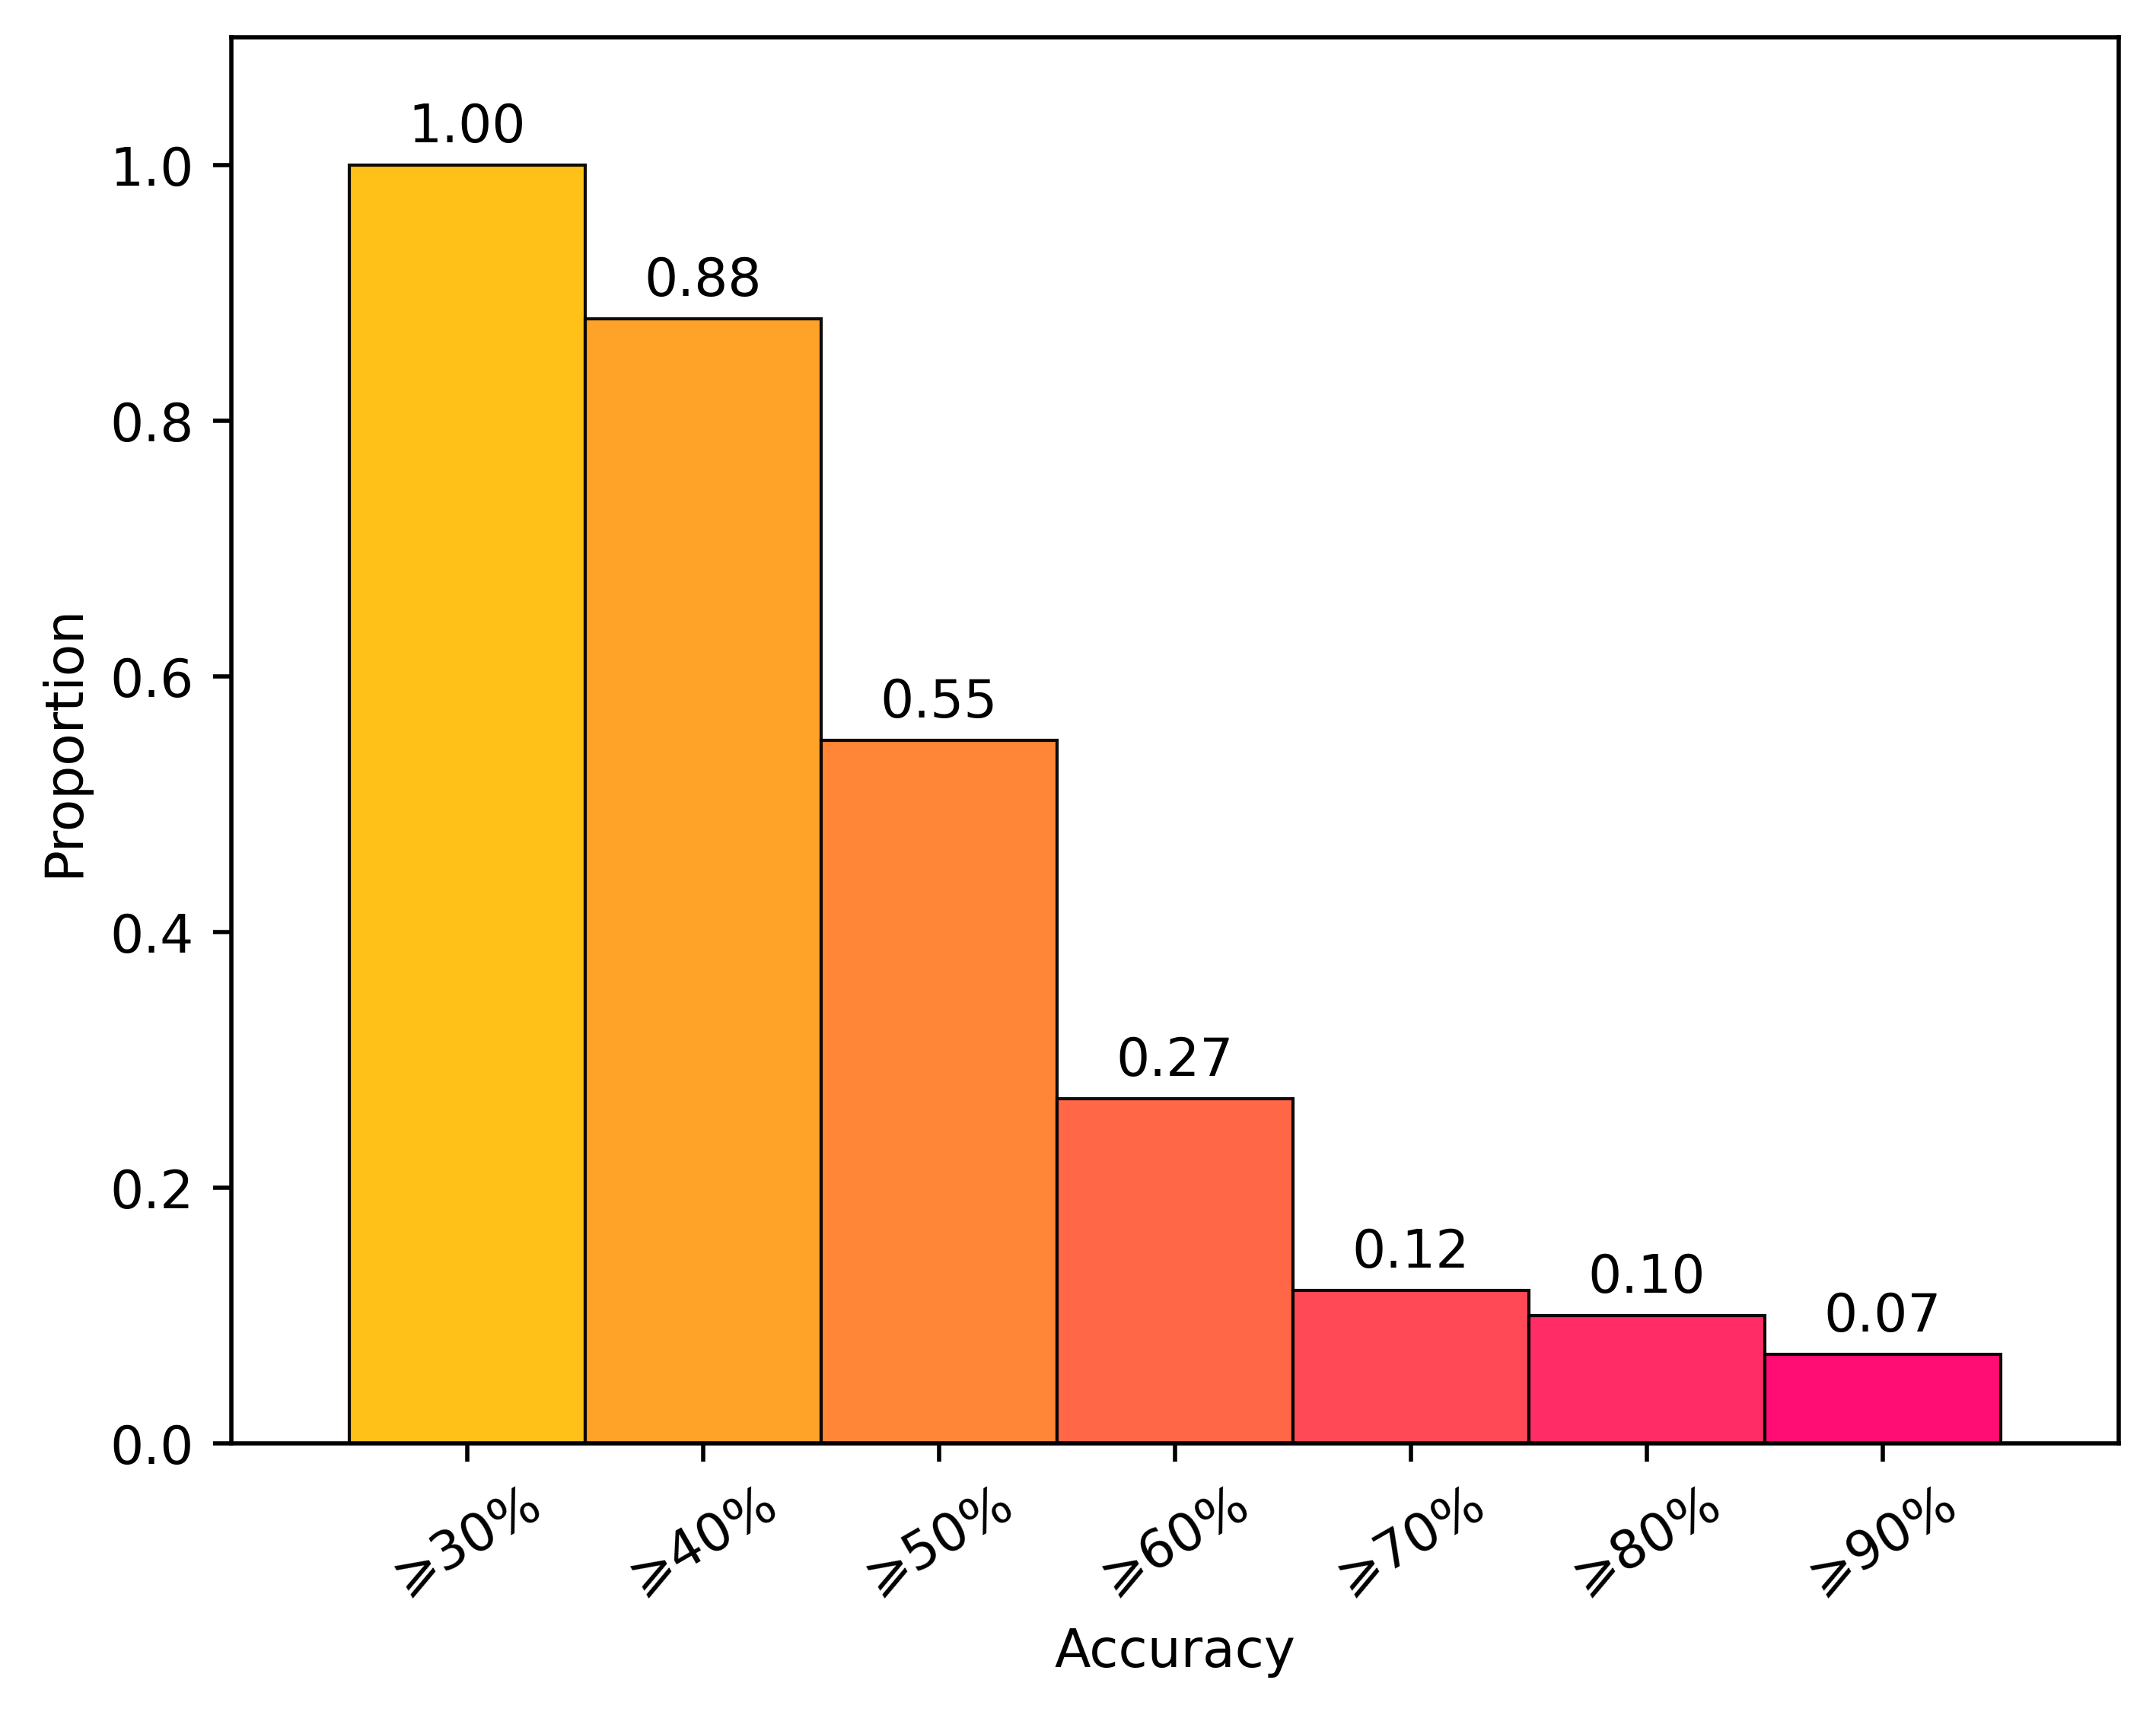

In [13]:
acc_intervals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
acc_interval_num = []
print(acc_interval_num)
#for i in range(0,len(acc_intervals)-1):
#    acc_interval_num.append(search_list_interval_num(acc_rate_list,acc_intervals[i],acc_intervals[i+1]))
#print(acc_interval_num)
from itertools import accumulate
cumulative_sum = list(accumulate(acc_interval_num))
acc_interval_num

data = cumulative_sum[::-1]
#data = [i/len(acc_rate_list) for i in data]

data= [1.0, 0.88,0.55,0.27,0.12,0.10,0.07]
# labels = ['0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-8', '0.8-0.9', '0.9-1']
labels = ['$\geqslant 30\%$', '$\geqslant 40\%$', '$\geqslant 50\%$', '$\geqslant 60\%$', '$\geqslant 70\%$', '$\geqslant 80\%$', '$\geqslant 90\%$']

fig = plt.figure( dpi=500)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
start= 0xFFBE0B    #0xF6C0B7# From
stop= 0xFF006E  #3A86FF  #4F9EAF# To
num=7# Divided into 100 steps   颜色的个数

color_list=["#{:02x}{:02x}{:02x}".format(x,y,z) for x,y,z in zip(\
np.round(np.linspace(start>>16,stop>>16,num)).astype(int),\
np.round(np.linspace((start>>8)&0xFF,(stop>>8)&0xFF,num)).astype(int),\
np.round(np.linspace(start&0xFF,stop&0xFF,num)).astype(int))]


# 绘制直方图
plt.bar(x=labels,
        height=data, 
        color=color_list, 
        hatch='', 
        edgecolor='black',
        linewidth=0.6,
        width=1,#0.88,
        alpha=0.95,
        align='center'
       )
for i, v in enumerate(data):
    T=plt.text(x=i,
             y=v+0.01, 
             s="{:.2f}".format(v), 
             ha='center',
             va='bottom',
            )
    if i==6:
        break

# 添加标题和标签
# plt.title('fault_ans_adv_2')
plt.xlabel('Audibility Interval', fontsize=10)
plt.ylabel('Values')
# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)

plt.xticks(x=0.5,
           y=0,
           rotation=30,
           ha='center',
           fontsize=10
          
          )

# 添加标题和标签
#plt.title('acc_distribution')
plt.title('')
plt.xlabel('Accuracy')
plt.ylabel('Proportion')
# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)
# plt.ylim([0, 0.8])
# plt.xlim([0, 1])
plt.xlim([-1,7])
plt.ylim([0, 1.1])
# plt.xticks(rotation=30, ha='right',fontsize=10)
# plt.tight_layout()
# 显示图形
# 
# 显示图形

plt.savefig(f'./vmoat2025_fig/Overall accuracy rate distribution.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
acc_intervals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
acc_interval_num = []
print(acc_interval_num)

for i in range(0,len(acc_intervals)-1):
    acc_interval_num.append(search_list_interval_num(acc_rate_list,acc_intervals[i],acc_intervals[i+1]))
print(acc_interval_num)
from itertools import accumulate
cumulative_sum = list(accumulate(acc_interval_num))
acc_interval_num

data = cumulative_sum[::-1]
data = [i/len(acc_rate_list) for i in data]
# labels = ['0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-8', '0.8-0.9', '0.9-1']
labels = ['0.3+', '0.4+', '0.5+', '0.6+', '0.7+', '0.8+', '0.9+']

# 绘制直方图
plt.bar(labels, data, color='orange') #, edgecolor='black')

# 添加标题和标签
plt.title('acc_distribution')
plt.xlabel('Labels')
plt.ylabel('Values')
# plt.ylim([0, 350])
plt.xticks(rotation='vertical')

# 显示图形
plt.show()

# ----------------------------------------------------------------------------------------------------------
## 下一个图  adv_acc/acc_distribution

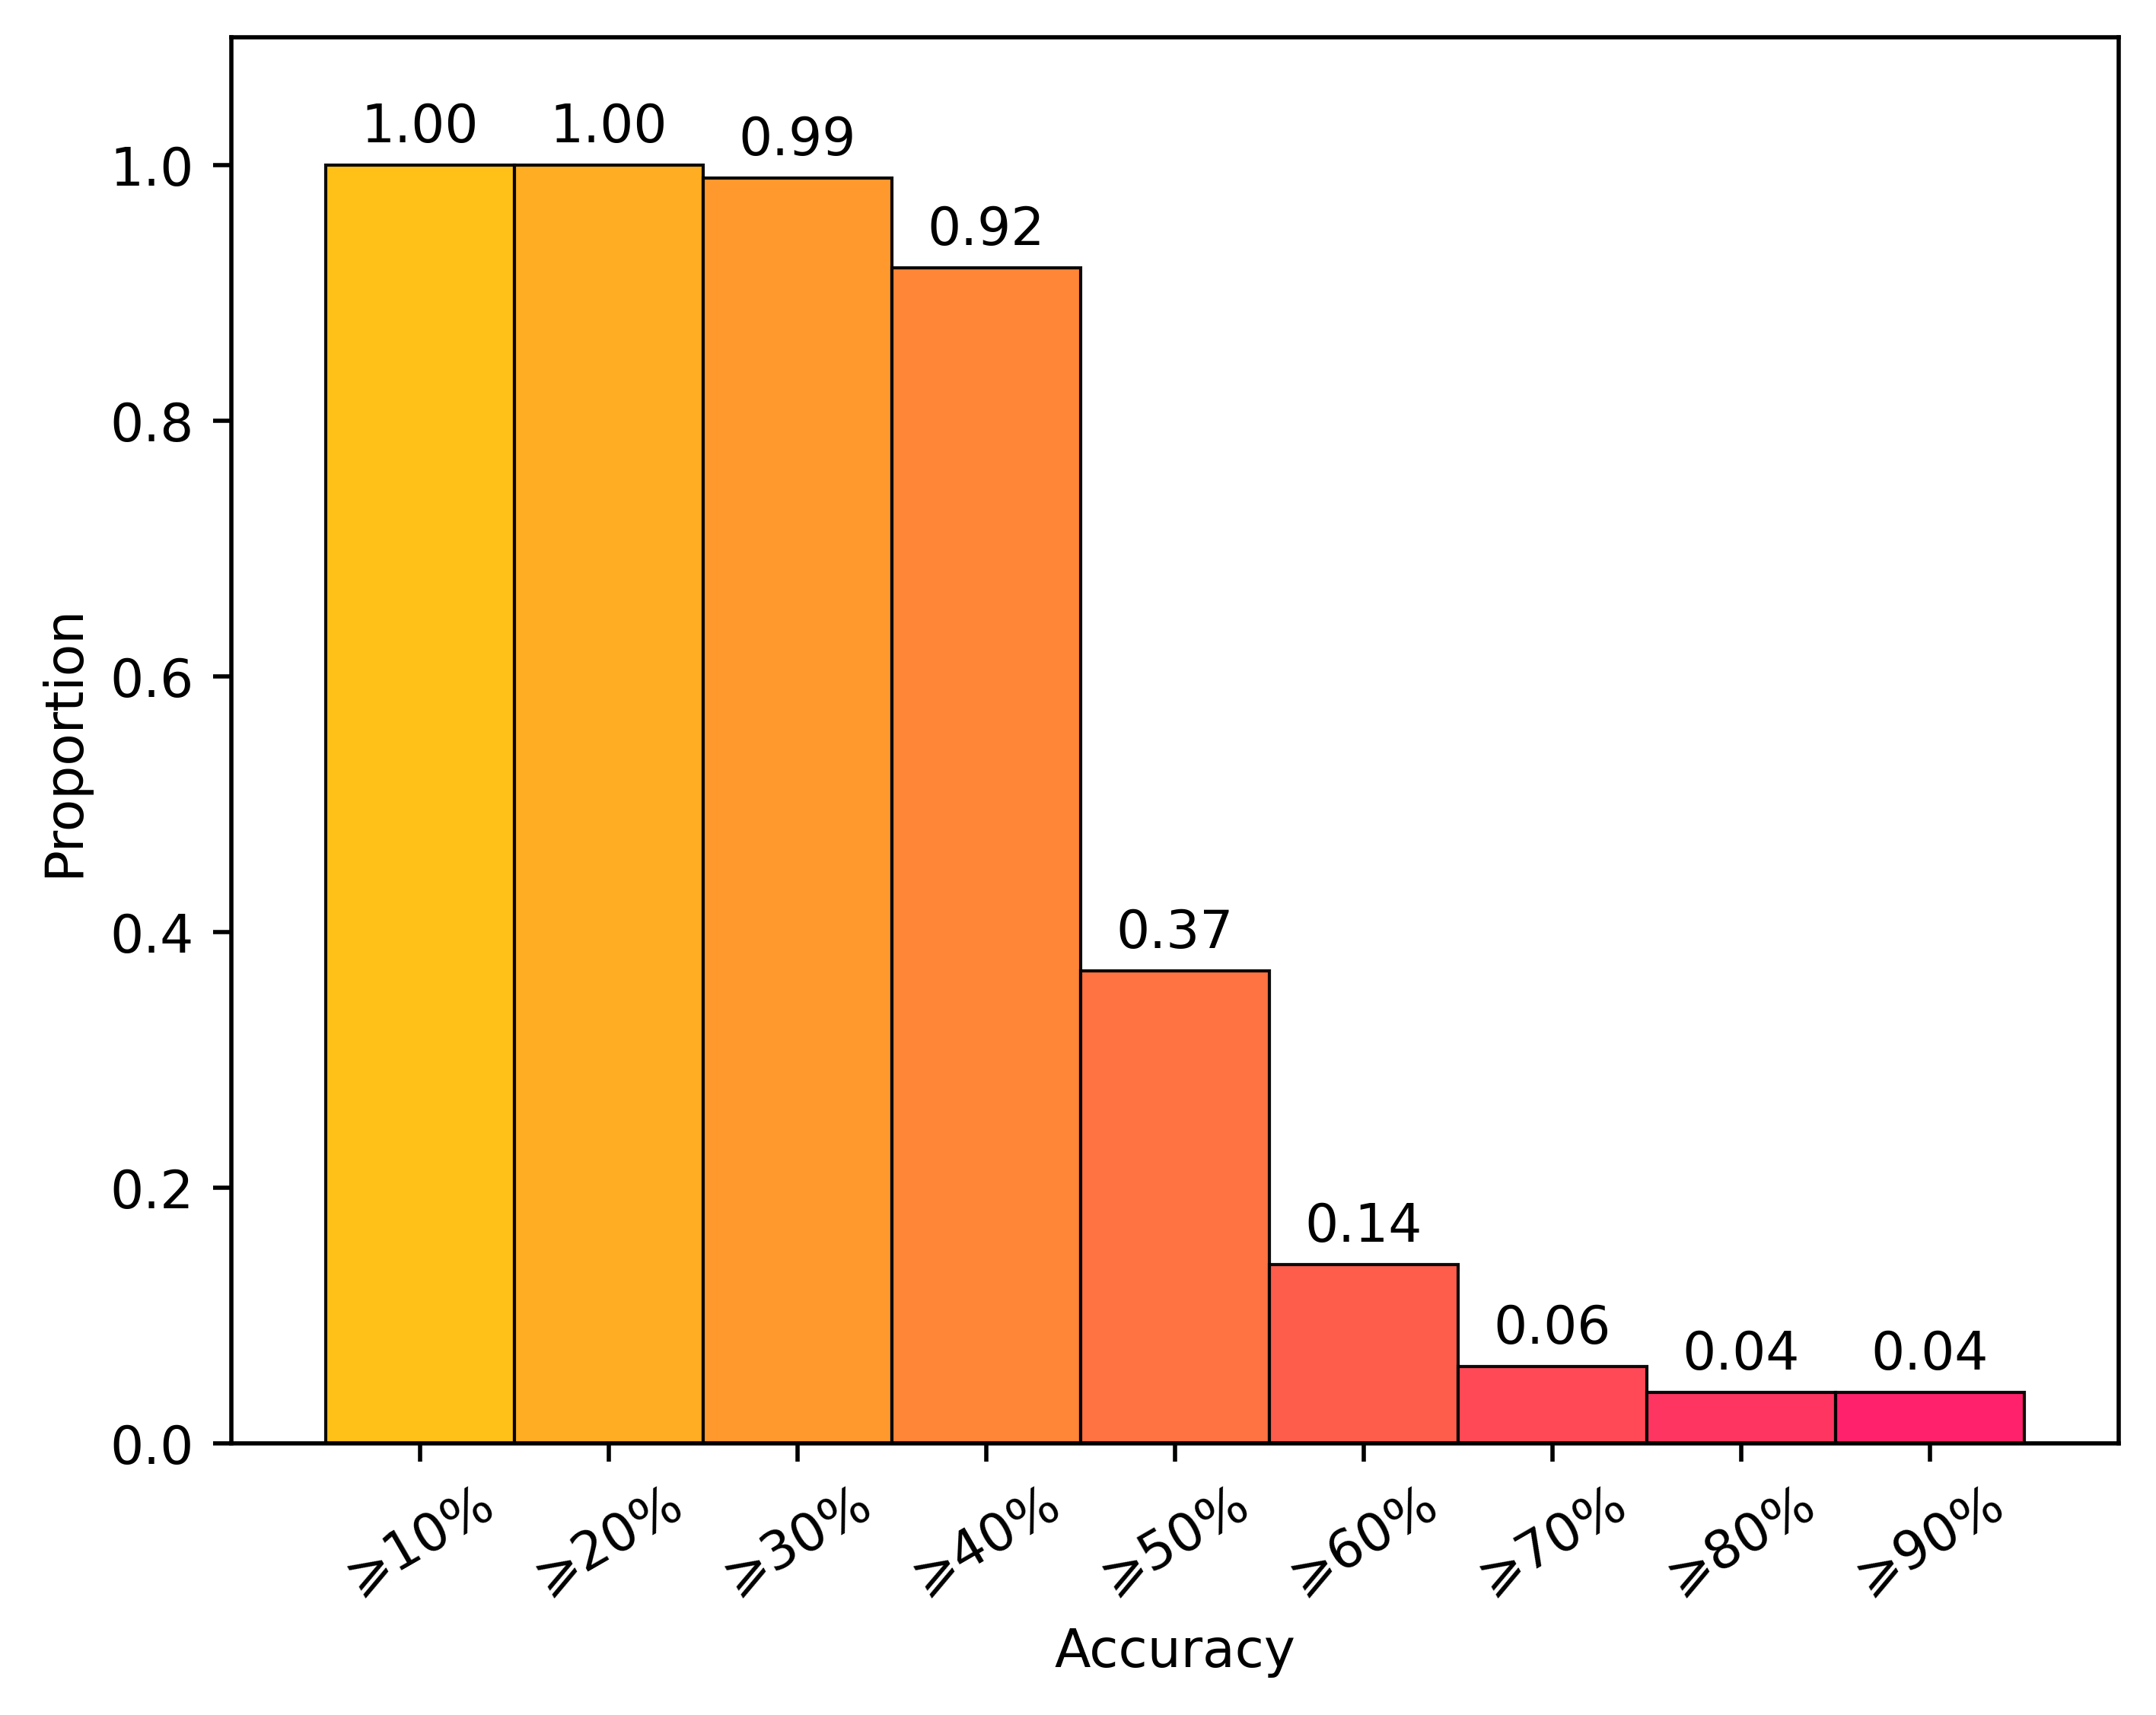

In [25]:
# 将adv判断正确的数量/总的判断正确的数量
# 对于adv样本回答的正确率，的分布
# 对adv样本回答正确率在0.1以上的人占所有人的100%
acc_intervals = [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#acc_interval_num = []
#for i in range(0,len(acc_intervals)-1):
#    acc_interval_num.append(search_list_interval_num(acc_rate_adv_list,acc_intervals[i],acc_intervals[i+1]))
#acc_interval_num
#from itertools import accumulate
#cumulative_sum = list(accumulate(acc_interval_num))
#data = cumulative_sum[::-1]
#data = [i/len(acc_rate_list) for i in data]

data=[1.0, 1.0, 0.99, 0.92, 0.37, 0.14, 0.06, 0.04, 0.04]
# labels = ['0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-8', '0.8-0.9', '0.9-1']
labels = ['$\geqslant 10\%$','$\geqslant 20\%$','$\geqslant 30\%$', '$\geqslant 40\%$', '$\geqslant 50\%$', '$\geqslant 60\%$', '$\geqslant 70\%$', '$\geqslant 80\%$', '$\geqslant 90\%$']

fig = plt.figure( dpi=500)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
start= 0xFFBE0B    #0xF6C0B7# From
stop= 0xFF006E  #3A86FF  #4F9EAF# To
num=10# Divided into 100 steps   颜色的个数

color_list=["#{:02x}{:02x}{:02x}".format(x,y,z) for x,y,z in zip(\
np.round(np.linspace(start>>16,stop>>16,num)).astype(int),\
np.round(np.linspace((start>>8)&0xFF,(stop>>8)&0xFF,num)).astype(int),\
np.round(np.linspace(start&0xFF,stop&0xFF,num)).astype(int))]


# 绘制直方图
plt.bar(x=labels,
        height=data, 
        color=color_list, 
        hatch='', 
        edgecolor='black',
        linewidth=0.6,
        width=1,#0.88,
        alpha=0.95,
        align='center'
       )
for i, v in enumerate(data):
    T=plt.text(x=i,
             y=v+0.01, 
             s="{:.2f}".format(v), 
             ha='center',
             va='bottom',
            )
    if i==9:
        break

# 添加标题和标签
# plt.title('fault_ans_adv_2')

# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)

plt.xticks(x=0.5,
           y=0,
           rotation=30,
           ha='center',
           fontsize=10
          
          )


# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)

plt.xlim([-1,9])
plt.ylim([0, 1.1])
# plt.xticks(rotation=30, ha='right',fontsize=10)
# plt.tight_layout()


# 添加标题和标签
#plt.title('adv_acc/acc_distribution')
plt.title('')
plt.xlabel('Accuracy')
plt.ylabel('Proportion')


# 显示图形

plt.savefig(f'./vmoat2025_fig/The accuracy distribution of noise audio.pdf', bbox_inches = 'tight')
plt.show()





In [ ]:
# 将adv判断正确的数量/总的判断正确的数量
# 对于adv样本回答的正确率，的分布
# 对adv样本回答正确率在0.1以上的人占所有人的100%
acc_intervals = [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
acc_interval_num = []
for i in range(0,len(acc_intervals)-1):
    acc_interval_num.append(search_list_interval_num(acc_rate_adv_list,acc_intervals[i],acc_intervals[i+1]))
acc_interval_num
from itertools import accumulate
cumulative_sum = list(accumulate(acc_interval_num))
data = cumulative_sum[::-1]
data = [i/len(acc_rate_list) for i in data]

# labels = ['0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-8', '0.8-0.9', '0.9-1']
labels = ['0.1+','0.2+','0.3+', '0.4+', '0.5+', '0.6+', '0.7+', '0.8+', '0.9+']

# 绘制直方图
plt.bar(labels, data, color='orange') #, edgecolor='black')

# 添加标题和标签
plt.title('adv_acc/acc _distribution')
plt.xlabel('Labels')
plt.ylabel('Values')
# plt.ylim([0, 350])
plt.xticks(rotation='vertical')

# 显示图形
plt.show()





# -----------------------------------------------------------------------------------------------------------
## 下一个图  clean_acc/acc_distribution

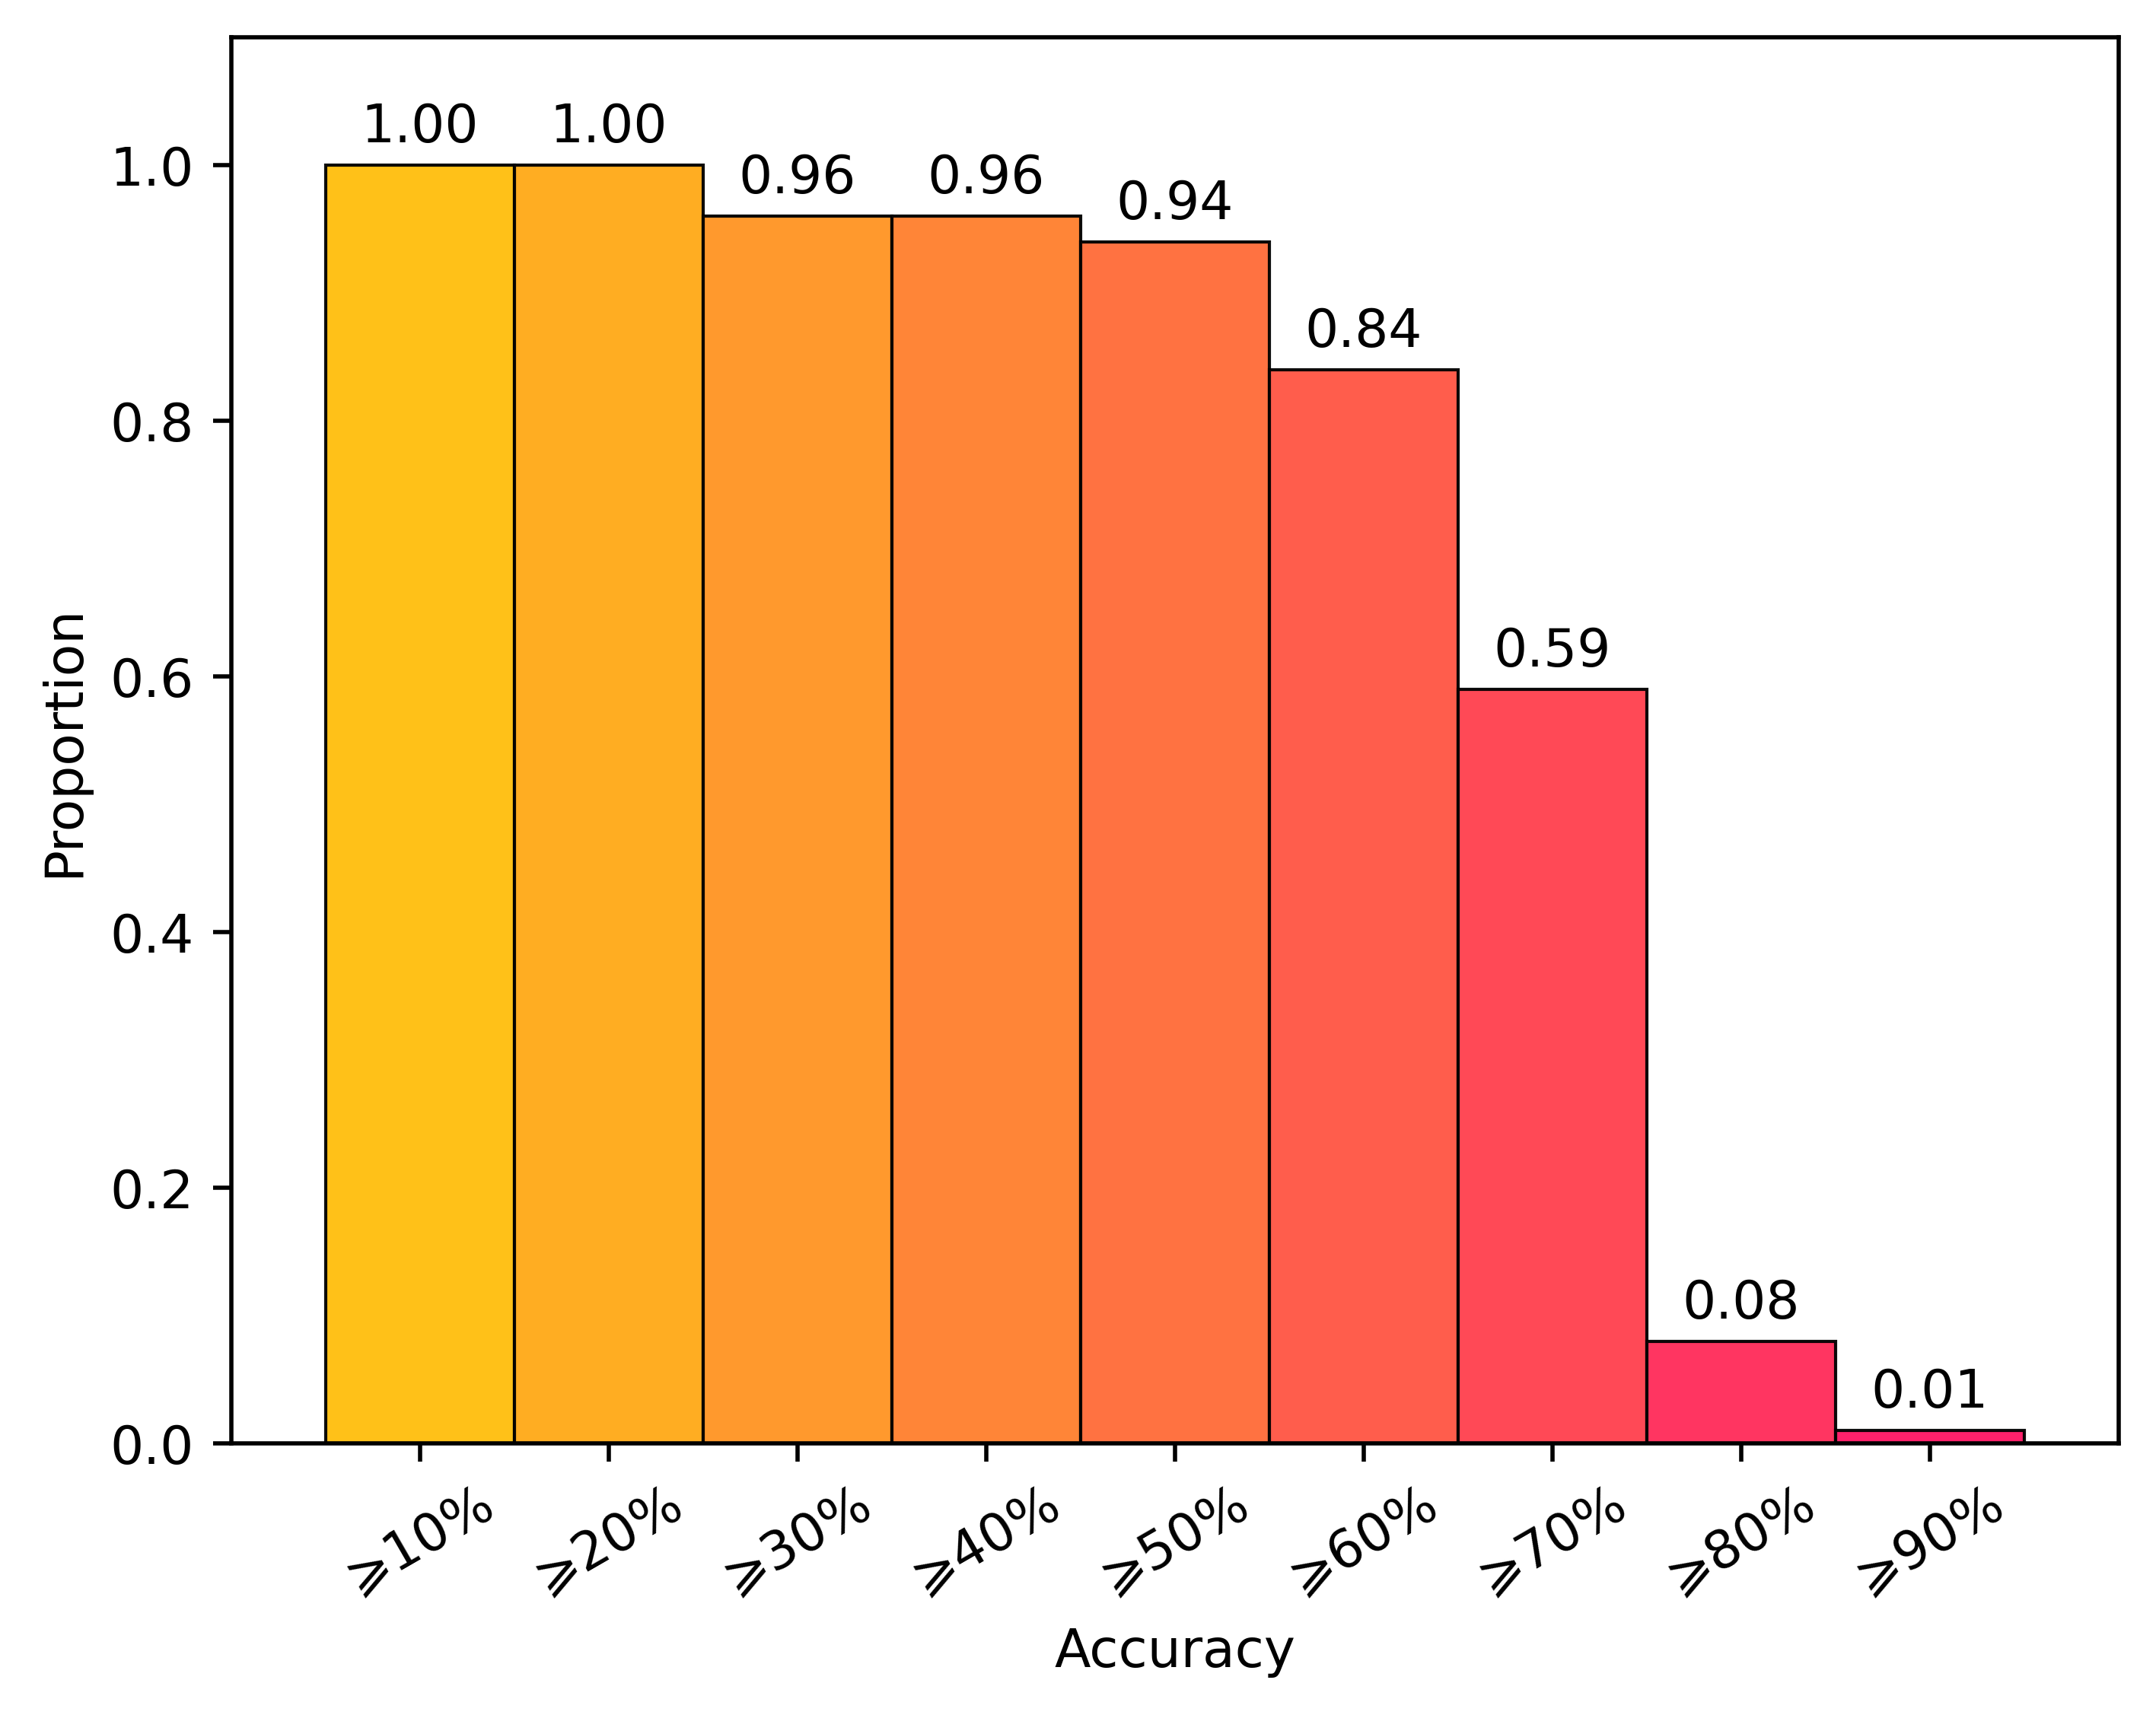

In [26]:
# 将clean判断正确的数量/总的判断正确的数量
# 对于clean样本回答准确率的分布
acc_intervals = [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#acc_interval_num = []
#for i in range(0,len(acc_intervals)-1):
#    acc_interval_num.append(search_list_interval_num(acc_rate_clean_list,acc_intervals[i],acc_intervals[i+1]))
#acc_interval_num
#from itertools import accumulate
#cumulative_sum = list(accumulate(acc_interval_num))
#data = cumulative_sum[::-1]
#data = [i/len(acc_rate_list) for i in data]

data = [1.0,1.0,0.96,0.96,0.94,0.84,0.59,0.08,0.01]
# labels = ['0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-8', '0.8-0.9', '0.9-1']
labels = ['$\geqslant 10\%$','$\geqslant 20\%$','$\geqslant 30\%$', '$\geqslant 40\%$', '$\geqslant 50\%$', '$\geqslant 60\%$', '$\geqslant 70\%$', '$\geqslant 80\%$', '$\geqslant 90\%$']


# 绘制直方图

fig = plt.figure( dpi=500)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
start= 0xFFBE0B    #0xF6C0B7# From
stop= 0xFF006E  #3A86FF  #4F9EAF# To
num=10# Divided into 100 steps   颜色的个数

color_list=["#{:02x}{:02x}{:02x}".format(x,y,z) for x,y,z in zip(\
np.round(np.linspace(start>>16,stop>>16,num)).astype(int),\
np.round(np.linspace((start>>8)&0xFF,(stop>>8)&0xFF,num)).astype(int),\
np.round(np.linspace(start&0xFF,stop&0xFF,num)).astype(int))]


# 绘制直方图
plt.bar(x=labels,
        height=data, 
        color=color_list, 
        hatch='', 
        edgecolor='black',
        linewidth=0.6,
        width=1,#0.88,
        alpha=0.95,
        align='center'
       )
for i, v in enumerate(data):
    T=plt.text(x=i,
             y=v+0.01, 
             s="{:.2f}".format(v), 
             ha='center',
             va='bottom',
            )
    if i==9:
        break

# 添加标题和标签
# plt.title('fault_ans_adv_2')

# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)

plt.xticks(x=0.5,
           y=0,
           rotation=30,
           ha='center',
           fontsize=10
          
          )


# plt.grid(color='lightgrey', linestyle='-', alpha=0.5, zorder=0)

plt.xlim([-1,9])
plt.ylim([0, 1.1])
# plt.xticks(rotation=30, ha='right',fontsize=10)
# plt.tight_layout()


# 添加标题和标签
#plt.title('clean_acc/acc_distribution')
plt.title('')
plt.xlabel('Accuracy')
plt.ylabel('Proportion')


# 显示图形
plt.savefig(f'./vmoat2025_fig/The distribution of clean audio accuracy rates.pdf', bbox_inches = 'tight')
plt.show()





In [ ]:
# 将clean判断正确的数量/总的判断正确的数量
# 对于clean样本回答准确率的分布
acc_intervals = [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
acc_interval_num = []
for i in range(0,len(acc_intervals)-1):
    acc_interval_num.append(search_list_interval_num(acc_rate_clean_list,acc_intervals[i],acc_intervals[i+1]))
acc_interval_num
from itertools import accumulate
cumulative_sum = list(accumulate(acc_interval_num))
data = cumulative_sum[::-1]
data = [i/len(acc_rate_list) for i in data]

# labels = ['0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-8', '0.8-0.9', '0.9-1']
labels = ['0.1+','0.2+','0.3+', '0.4+', '0.5+', '0.6+', '0.7+', '0.8+', '0.9+']

# 绘制直方图
plt.bar(labels, data, color='orange') #, edgecolor='black')

# 添加标题和标签
plt.title('clean_acc/acc _distribution')
plt.xlabel('Labels')
plt.ylabel('Values')
# plt.ylim([0, 350])
plt.xticks(rotation='vertical')

# 显示图形
plt.show()





In [ ]:
len(acc_rate_clean_list)

In [ ]:
# 使用新的方式修改一下audi的计算方法
import pandas as pd

# 创建一个空的DataFrame
df = pd.DataFrame()

# 添加一列数据
df['A'] = [1, 2, 3, 4]

# 添加另一列数据
df['B'] = ['a', 'b', 'c', 'd']

# 显示DataFrame
print(df)






In [ ]:
import torch
import torch.nn as nn

# 创建一个大小为 (22, 1025) 的输入张量，全部为 1
input_tensor = torch.ones(22, 1025)

# 定义一个线性层
linear_layer = nn.Linear(1025, 1025)

# 将输入张量传递通过线性层
output_tensor = linear_layer(input_tensor)

# 打印输出张量的大小
print("Input Tensor Size:", input_tensor)
print("Output Tensor Size:", output_tensor)
